# Data Processing

## Read data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Load the training data and the test inputs
X_train = pd.read_csv('X_train.csv', index_col = 0, header=[0, 1, 2]) # inputs of the training set
y_train = pd.read_csv('y_train.csv', index_col = 0).squeeze().to_numpy() # outputs of the training set
X_test = pd.read_csv('X_test.csv', index_col = 0, header=[0, 1, 2]) # inputs of the test set

In [3]:
n, p = np.shape(X_train)
X_train.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
Id                                                                         
0            -0.266585 -0.984668 -0.729823 -0.895122  2.138628  0.935209   
1            -0.180061  0.260884 -0.069373  0.208734 -0.078855 -0.577818   
2            -0.692900  0.356662  0.062617  0.248280  3.470037  0.166613   
3             0.243339  0.214182 -0.049026  1.456255 -0.360826 -0.875256   
4            -0.968576  0.309255  0.223164  0.160960  0.919838 -0.111985   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
Id                                                  ...                       
0           0.104089 -0.698659 -0.736408 -0.334376  ...  0.065003  0.016522   
1           0.583788  0.143781  0.291556  0.007314  ...  0.087692  0.016355   
2           0.823874  0.181112  0.551939  0.357985  ...  0.132387  0.025847   
3          -0.770200  0.315500  0.789956  0.448319  ...  0.071478  0.019166   
4          -1.012521 -0.665692 -0.316646 -0.264381  ...  0.106220  0.023536   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
Id                                                                        
0           0.015776   5.743597  0.307617  0.051370  0.042480  0.002441   
1           0.016605  64.870987  0.812988  0.082784  0.069824  0.003906   
2           0.023922  34.251705  0.850098  0.058200  0.036621  0.010254   
3           0.025535   1.364990  0.342285  0.081713  0.075195  0.000000   
4           0.019742   3.589230  0.322266  0.073736  0.069336  0.004395   

feature                         
statistics      skew       std  
number            01        01  
Id                              
0           1.976972  0.034533  
1           7.374503  0.074870  
2           5.927942  0.117603  
3           1.100437  0.041754  
4           1.210593  0.036459  

[5 rows x 518 columns]

In [4]:
print(y_train.shape)
print(np.unique(y_train))

(6000,)
['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock']


In [5]:
X_test.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
Id                                                                         
0             3.974762  4.354650  3.394523  0.033462  5.611623  2.592655   
1             0.033636 -0.139950  0.678688 -0.553824 -0.165293  0.370275   
2             0.044094  4.285359  0.977213  3.240997  0.400350  1.026224   
3            -0.425218  0.793007  0.509624 -0.967103 -1.432252 -0.900761   
4            -1.120238 -0.503659  0.303515 -0.596549 -0.716761 -0.874363   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
Id                                                  ...                       
0           3.041094  2.815378  3.954026  2.365586  ...  0.052970  0.013487   
1          -0.314710 -0.368706 -0.437181 -0.441662  ...  0.093105  0.022865   
2           0.772464  0.807625  1.942534  1.938970  ...  0.081955  0.017371   
3          -0.501279 -0.855886 -0.556825  7.404243  ...  0.098877  0.019089   
4          -0.708101 -0.642351 -0.327327 -0.342220  ...  0.102545  0.023823   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
Id                                                                        
0           0.022031  70.844788  0.671387  0.035129  0.026367  0.010254   
1           0.028800  18.427612  0.538574  0.055975  0.039062  0.000000   
2           0.016673  38.401405  0.405762  0.030685  0.028809  0.002930   
3           0.016183   4.129582  0.252441  0.037955  0.024902  0.000000   
4           0.025166  16.758356  0.380371  0.027851  0.019043  0.000000   

feature                         
statistics      skew       std  
number            01        01  
Id                              
0           8.394708  0.067026  
1           3.638194  0.053879  
2           2.620369  0.016835  
3           1.898847  0.034382  
4           3.244483  0.027128  

[5 rows x 518 columns]

In [6]:
column_names = pd.DataFrame(X_train.columns.values.tolist())

In [7]:
print(column_names.head())
column0 = np.unique(column_names.iloc[:, 0])
column1 = np.unique(column_names.iloc[:, 1])

             0         1   2
0  chroma_cens  kurtosis  01
1  chroma_cens  kurtosis  02
2  chroma_cens  kurtosis  03
3  chroma_cens  kurtosis  04
4  chroma_cens  kurtosis  05


In [8]:
print(column0)
print(column1)

['chroma_cens' 'chroma_cqt' 'chroma_stft' 'mfcc' 'rmse'
 'spectral_bandwidth' 'spectral_centroid' 'spectral_contrast'
 'spectral_rolloff' 'tonnetz' 'zcr']
['kurtosis' 'max' 'mean' 'median' 'min' 'skew' 'std']


In [9]:
column_count = column_names.groupby([0, 1]).size().unstack(fill_value=0)
column_count

1,kurtosis,max,mean,median,min,skew,std
0,,,,,,,
chroma_cens,12,12,12,12,12,12,12
chroma_cqt,12,12,12,12,12,12,12
chroma_stft,12,12,12,12,12,12,12
mfcc,20,20,20,20,20,20,20
rmse,1,1,1,1,1,1,1
spectral_bandwidth,1,1,1,1,1,1,1
spectral_centroid,1,1,1,1,1,1,1
spectral_contrast,7,7,7,7,7,7,7
spectral_rolloff,1,1,1,1,1,1,1


[Text(0.5, 23.52222222222222, 'Summary Statistics'),
 Text(50.58159722222221, 0.5, 'Feature Name')]

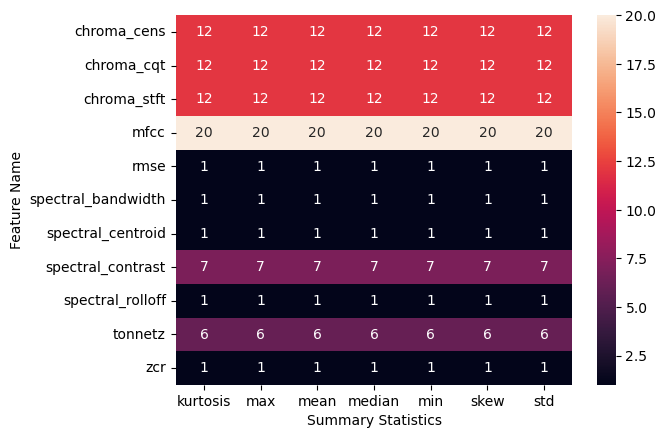

In [10]:
heatmap = sns.heatmap(column_count, annot=True, annot_kws={"size": 10})
heatmap.set(xlabel='Summary Statistics', ylabel='Feature Name')

## Dimension Reduction

### Normalise data

In [11]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

### PCA

Eigenvalues/variance of the projections:
 [60.49781482 39.68887579 23.43502079 15.90884542 14.72635021 14.4717317
 13.26061291 12.94428651 11.94525907 10.39262948  9.40610961  8.36883435
  8.06039556  7.99190169  7.12338909  6.36493899  5.96149562  5.47980736
  5.08262903  4.8829796   4.61072666  4.43539697  4.16757346  3.97594803
  3.86275804  3.59112936  3.47607511  3.44854584  3.28656285  3.07901039
  2.99007942  2.87064456  2.75555404  2.64350734  2.6049787   2.57481448
  2.55315189  2.43393365  2.358555    2.33834099  2.30450893  2.21349867
  2.15464201  2.14656623  2.07792364  1.9931584   1.92747239  1.91987396
  1.90258648  1.87072904]

Proportion of variance explained:
 [0.11677168 0.07660668 0.04523381 0.03070694 0.02842451 0.02793305
 0.02559537 0.02498481 0.0230565  0.02005965 0.01815549 0.01615336
 0.01555802 0.01542581 0.01374942 0.01228548 0.01150676 0.01057702
 0.00981039 0.00942503 0.00889953 0.00856112 0.00804417 0.0076743
 0.00745582 0.00693153 0.00670945 0.00665631 0

Text(0.5, 0, 'PC index')

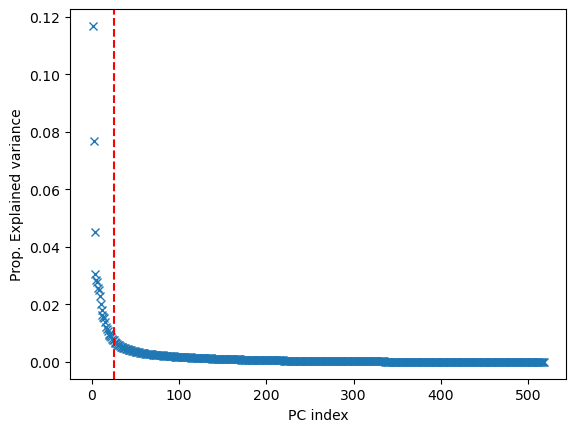

In [13]:
pca = PCA(n_components=p)
pca.fit(X_train_sc)
V = pd.DataFrame(data=pca.components_.T, columns=[f'PC{i}' for i in range(1, p+1)])
lam = pca.explained_variance_
norm_lam = pca.explained_variance_ratio_
print('Eigenvalues/variance of the projections:\n', lam[range(50)])
print('\nProportion of variance explained:\n', norm_lam[range(50)])
p_PCA = 25
plt.figure()
plt.plot(range(1, p+1), norm_lam, 'x')
plt.axvline(p_PCA, color='r', linestyle='--')
plt.ylabel('Prop. Explained variance')
plt.xlabel('PC index')

c:\Users\Liu_h\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

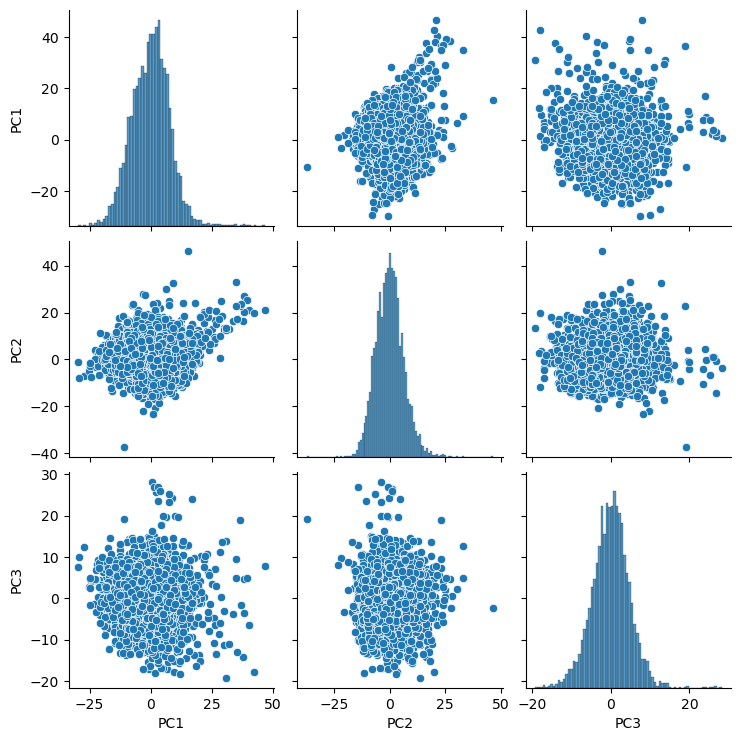

In [14]:
pca = PCA(n_components=p_PCA)
pca.fit(X_train_sc)
Z_pca = pca.transform(X_train_sc)
X_train_PCA = pd.DataFrame(Z_pca[:, [0, 1, 2]], columns=['PC1', 'PC2', 'PC3'])
plt.figure()
sns.pairplot(data=X_train_PCA)

Limitation: Difficult to find the elbow value for the explained variance. The variance is scattered across all dimensions. No significant jump for the variance values.

### LDA

In [15]:
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train_sc, y_train)
X_train_LDA = lda.transform(X_train_sc)
print(X_train_LDA.shape)

(6000, 7)


We choose LDA for the following machine learning methods.